# 1. 전력사용량 예측

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

* num속성은 건물번호

In [2]:
train = pd.read_csv('energy_train.csv', encoding='cp949')

In [3]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [4]:
train.tail()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0
122399,60,2020-08-24 23,3204.576,27.1,2.6,75.0,0.0,0.0,1.0,1.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


## 2. 데이터 탐색

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


* 한글 폰트 설정
    * 아래 드라이브에서 원하는 폰트 사용
    * 폰트에서 우클릭으로 파일명 확인 가능

In [8]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

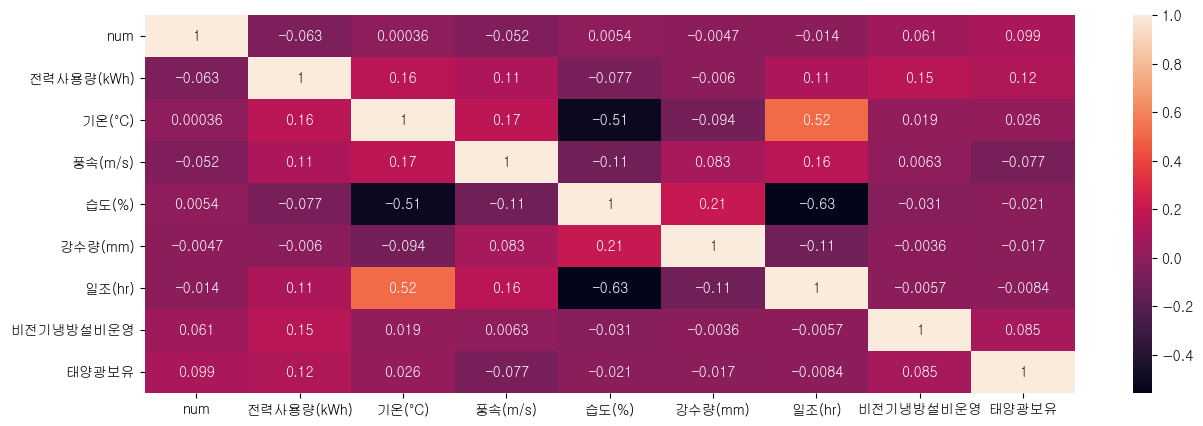

In [9]:
plt.figure(dpi=100, figsize=(15,5))
sns.heatmap(train.corr(method='pearson'), robust=True, annot=True)
plt.show()

In [10]:
cols = list(train.columns)

In [11]:
def boxplot_multi(data):
    cols = []
    for i in data.columns:
        if data[i].dtypes == "float64" or data[i].dtypes == 'int64':
            cols.append(i)
    
    gp = plt.figure(figsize=(20,20))
    gp.subplots_adjust(wspace=0.4, hspace=0.4)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(3, 4, i)
        sns.boxplot(x = cols[i-1], data=data)
        ax.set_title('Boxplot for {}'.format(cols[i-1]))

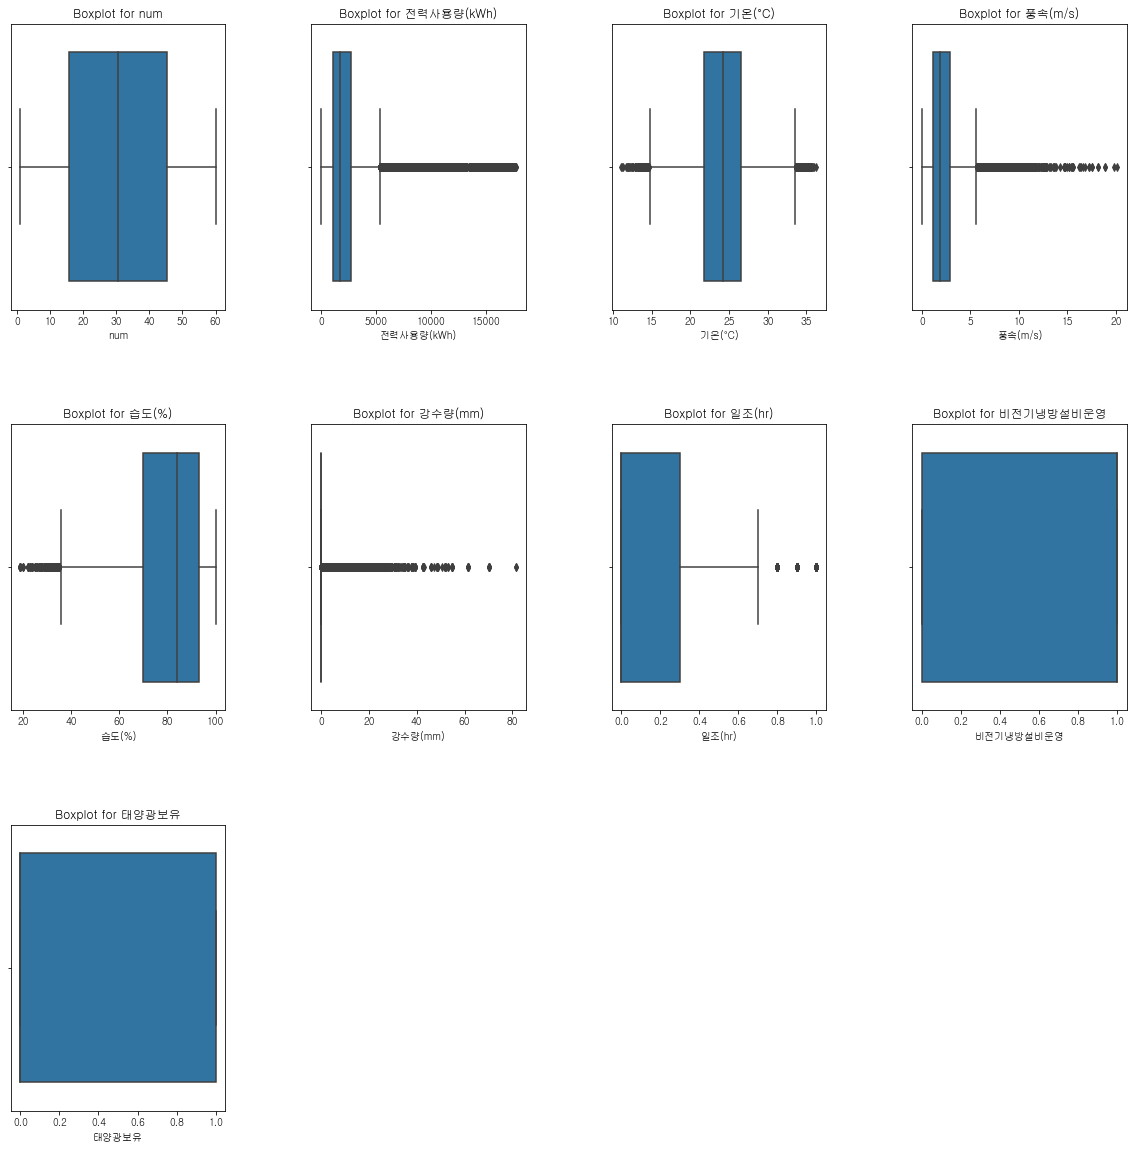

In [12]:
boxplot_multi(train[cols])

## 3. 데이터 전처리

* 날짜 datetime 형식으로 변환

In [13]:
train['date_time'] = pd.to_datetime(train['date_time'])

In [14]:
def date_preprocessing(df):
    df['hour'] = df['date_time'].dt.hour       #시간
    df['weekday'] = df['date_time'].dt.weekday #요일
    df['date'] = df['date_time'].dt.date       #날짜
    df['month'] = df['date_time'].dt.month     #월
    df['day'] = df['date_time'].dt.day         #일
    return df

In [15]:
train = date_preprocessing(train)

In [16]:
train['date']

0         2020-06-01
1         2020-06-01
2         2020-06-01
3         2020-06-01
4         2020-06-01
             ...    
122395    2020-08-24
122396    2020-08-24
122397    2020-08-24
122398    2020-08-24
122399    2020-08-24
Name: date, Length: 122400, dtype: object

* 건물번호 범주형 변수로 바꾸고 one-hot encoding

In [17]:
train['num'] = train['num'].astype('category')
train = pd.get_dummies(train, prefix_sep='_',columns = ['num'])
train

,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,...,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60
0,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
3,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,...,0,0,0,0,0,0,0,0,0,1
122396,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,...,0,0,0,0,0,0,0,0,0,1
122397,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,...,0,0,0,0,0,0,0,0,0,1
122398,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,...,0,0,0,0,0,0,0,0,0,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date_time   122400 non-null  datetime64[ns]
 1   전력사용량(kWh)  122400 non-null  float64       
 2   기온(°C)      122400 non-null  float64       
 3   풍속(m/s)     122400 non-null  float64       
 4   습도(%)       122400 non-null  float64       
 5   강수량(mm)     122400 non-null  float64       
 6   일조(hr)      122400 non-null  float64       
 7   비전기냉방설비운영   122400 non-null  float64       
 8   태양광보유       122400 non-null  float64       
 9   hour        122400 non-null  int64         
 10  weekday     122400 non-null  int64         
 11  date        122400 non-null  object        
 12  month       122400 non-null  int64         
 13  day         122400 non-null  int64         
 14  num_1       122400 non-null  uint8         
 15  num_2       122400 non-null  uint8         
 16  nu

## 4. 데이터 분리

In [19]:
df = train.drop(columns=['date_time', '전력사용량(kWh)', 'date'])

In [20]:
df

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,month,...,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60
0,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,6,...,0,0,0,0,0,0,0,0,0,0
2,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,6,...,0,0,0,0,0,0,0,0,0,0
3,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,6,...,0,0,0,0,0,0,0,0,0,0
4,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,0,8,...,0,0,0,0,0,0,0,0,0,1
122396,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,0,8,...,0,0,0,0,0,0,0,0,0,1
122397,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,0,8,...,0,0,0,0,0,0,0,0,0,1
122398,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,0,8,...,0,0,0,0,0,0,0,0,0,1


In [21]:
target = train['전력사용량(kWh)']
target

0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: 전력사용량(kWh), Length: 122400, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(df, target, test_size=0.2,
                                                 random_state=2)

In [23]:
np.shape(trainx)

(97920, 71)

In [24]:
np.shape(testx)

(24480, 71)

## 5. 모델링 및 학습

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(trainx, trainy)
#train_pred = model.predict(trainx)

In [28]:
test_pred = model.predict(testx)

## 6. 성능평가

* 일반 선형 회귀와 딥러닝(LSTM) 성능 차이에 대한 논문

https://ieeexplore-ieee-org-ssl.eproxy.pusan.ac.kr/document/9848887

* MSE
    * 실제값과 예측값의 차이의 평균
        * 에러의 평균

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ae01f23f2ed2814c7db94e1fdc952732f5ca533a">

* RMSE
    * MSE를 구한 값에 루트를 씌운다.
    * 오류 지표를 실제 값과 유사한 단위로 변환하여 해석을 쉽게 한다.


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/af4b2b4b785c08cab0bfdbb1eb4e3ab878753b04">

In [29]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(trainy, train_pred) 
print('MSE : ', MSE)
print('RMSE : ', np.sqrt(MSE))

MSE :  711649.8566039337
RMSE :  843.5934190141206


In [30]:
MSE = mean_squared_error(testy, test_pred) 
print('MSE : ', MSE)
print('RMSE : ', np.sqrt(MSE))

MSE :  709370.4829739294
RMSE :  842.2413448495208


* 좋은 결과라고 보기는 힘듦
* 전력소비량은 시계열데이터의 형태를 띄고 있는데 이러한 형식에 더 적합한 모델을 사용한다면 더 좋은 결과를 보일 수 있을 것으로 보임

In [31]:
import pandas as pd
import numpy as np

def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output

In [32]:
smape(testy, test_pred)

26.575196705053433

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ada3996551e35503a1605edd4e35a26f1215d36">

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9d7003eba8a7ffe2379cd5c232adf78daa3d1edf">

* SMAPE는 Symmetric Mean Absolute Percentage Error입니다.
* MAPE의 경우 Actual 값이 0이거나 작은 경우 MAPE 값이 지나치게 커지는 문제 존재
    * SMAPE는 이를 개선한 Metric

# 2. 태양광 발전량 예측

## 1. 데이터 불러오기

In [33]:
train = pd.read_csv('sunlight_train.csv' , encoding='cp949')

In [34]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [35]:
train.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


    Hour - 시간
    Minute - 분
    DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
    DNI - 직달일사량(Direct Normal Irradiance (W/m2))
    WS - 풍속(Wind Speed (m/s))
    RH - 상대습도(Relative Humidity (%))
    T - 기온(Temperature (Degree C))
    Target - 태양광 발전량 (kW)1

## 2. 데이터 탐색

In [36]:
train.describe()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,547.000000,11.500000,15.000000,64.344121,234.792371,2.456033,56.793102,9.279928,17.790630
std,316.102148,6.922252,15.000143,103.897125,349.684583,1.426874,22.052875,10.179741,25.759955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000
25%,273.000000,5.750000,0.000000,0.000000,0.000000,1.400000,39.697500,1.000000,0.000000
50%,547.000000,11.500000,15.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000
75%,821.000000,17.250000,30.000000,87.000000,469.000000,3.200000,72.770000,17.000000,32.089890
max,1094.000000,23.000000,30.000000,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939


In [37]:
def boxplot_multi(data):   
    cols = []
    for i in data.columns:
        if data[i].dtypes == "float64" or data[i].dtypes == 'int64':
            cols.append(i)
    
    gp = plt.figure(figsize=(20,20))
    gp.subplots_adjust(wspace=0.4, hspace=0.4)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(3, 4, i)
        sns.boxplot(x = cols[i-1], data=data)
        ax.set_title('Boxplot for {}'.format(cols[i-1]))

In [38]:
cols = list(train.columns)

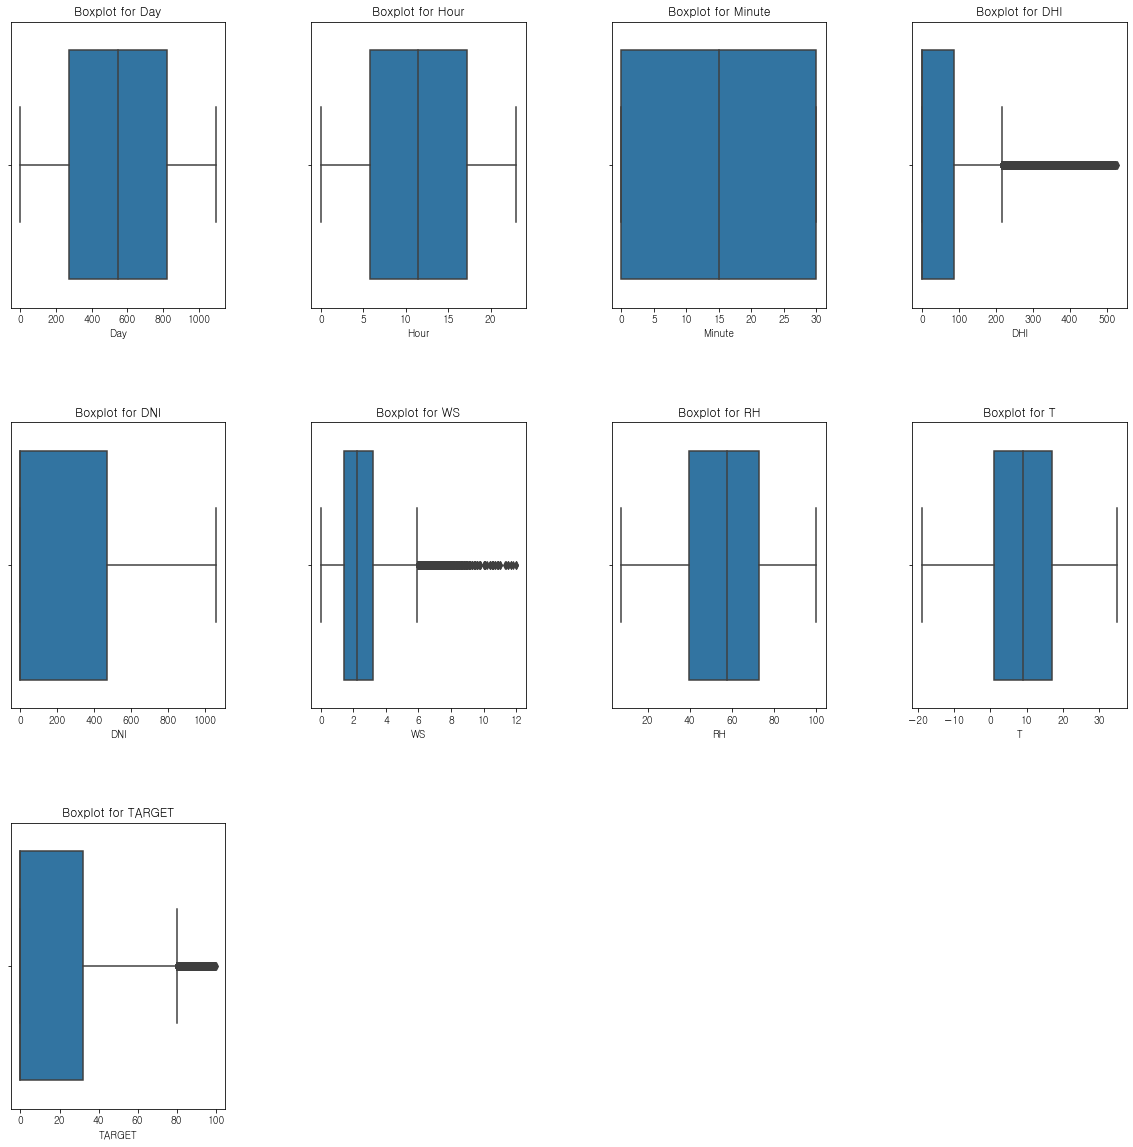

In [39]:
boxplot_multi(train[cols])

In [40]:
train.shape[0]

52560

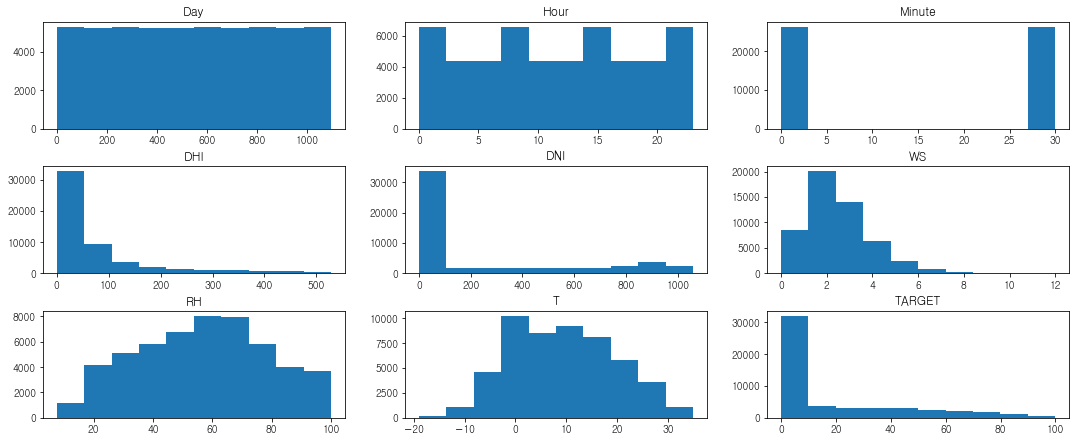

In [41]:
fig, axes = plt.subplots(3, 3)
plt.subplots_adjust(right=2.5, top=1.5, hspace=0.35)

for i in range(3):
    for j in range(3):
        axes[i][j].set_title(train.columns[j + i*3])
        axes[i][j].hist(train[train.columns[j + i*3]])
plt.show()

* 상관 관계 시각화

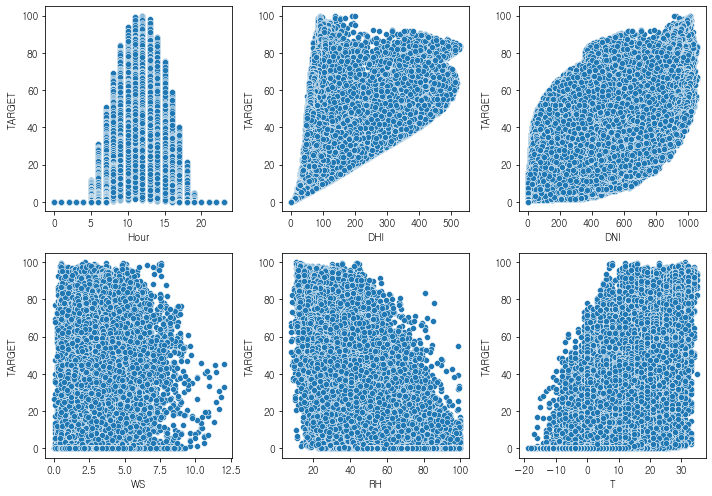

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(10,7))
sns.scatterplot(data=train, x='Hour', y='TARGET', ax=axes[0,0])
sns.scatterplot(data=train, x='DHI', y='TARGET', ax=axes[0,1])
sns.scatterplot(data=train, x='DNI', y='TARGET', ax=axes[0,2])
sns.scatterplot(data=train, x='WS', y='TARGET', ax=axes[1,0])
sns.scatterplot(data=train, x='RH', y='TARGET', ax=axes[1,1])
sns.scatterplot(data=train, x='T', y='TARGET', ax=axes[1,2])

fig.tight_layout()

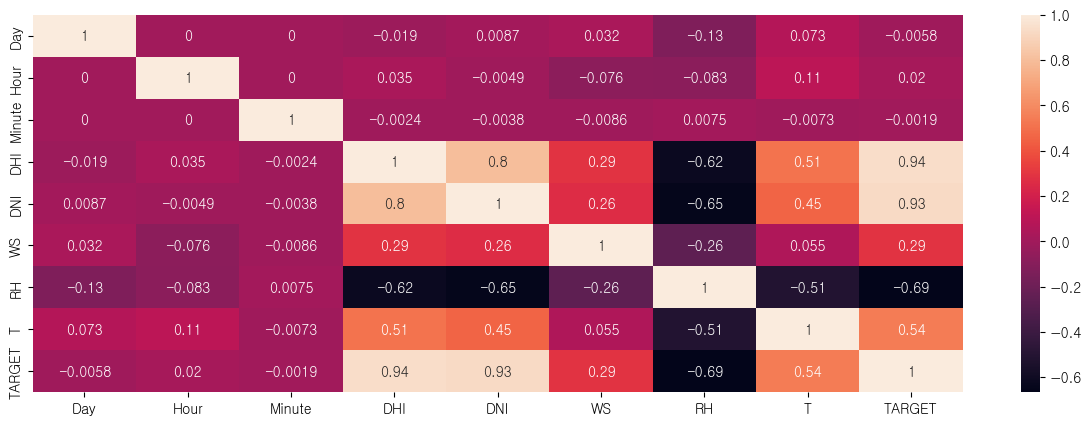

In [43]:
plt.figure(dpi=100, figsize=(15,5))
sns.heatmap(train.corr(method='spearman'), robust=True, annot=True)
plt.show()

In [44]:
temp_col = train.corr().loc['TARGET'][abs(train.corr().loc['TARGET']) >= 0.5].index[:-1]
train[temp_col]

,DHI,DNI,RH,T
0,0,0,69.08,-12
1,0,0,69.06,-12
2,0,0,71.78,-12
3,0,0,71.75,-12
4,0,0,75.20,-12
...,...,...,...,...
52555,0,0,70.70,-4
52556,0,0,66.79,-4
52557,0,0,66.78,-4
52558,0,0,67.72,-4


## 3. 데이터 전처리

* 도메인 지식에 대한 내용

https://www.kier.re.kr/upload/notic/PVCDROM-KOR.pdf

1. Hour 과 Minute를 1개 항목으로(float) 병합, day 항목 제거
2. sin cos 함수를 이용한 시간의 연속적 표현 (cyclical time encoding)
3. 가장 마지막 3, 5일 동시간 Target값의 평균
4. 기온과 상대습도를 이용한 이슬점 산출
5. DNI>0 여부에 따른 일출 일몰시간 추출
6. 일출 일몰 시간에 따른 년간, 일별 계절성(seasonality)를 고려한 일별 2차 함수 근사를 통해 zenith angle 산출
7. zenith angle과 DNI DHI를 이용한 GHI 산출
8. (solar zenith angle) + (solar altitude angle) = 90 degrees

이런 전처리 과정을 거쳐서 더 좋은 성능을 뽑아낼 수 있지만 너무 복잡함

도메인 지식에 대한 insight, 통계적 통찰력 등이 필요함

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.6 MB


## 4. 데이터 분리

In [46]:
df = train.drop(columns=['TARGET'])

In [47]:
target = train['TARGET']
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52555    0.0
52556    0.0
52557    0.0
52558    0.0
52559    0.0
Name: TARGET, Length: 52560, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(df, target, test_size=0.2,
                                                 random_state=2)

In [49]:
np.shape(trainx)

(42048, 8)

In [50]:
np.shape(testx)

(10512, 8)

## 5. 모델링 및 학습

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
model.fit(trainx, trainy)
train_pred = model.predict(trainx)

In [53]:
test_pred = model.predict(testx)

## 6. 성능평가

In [54]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(trainy, train_pred) 
print('MSE : ', MSE)
print('RMSE : ', np.sqrt(MSE))

MSE :  66.66253558647749
RMSE :  8.164712829394398


In [55]:
MSE = mean_squared_error(testy, test_pred) 
print('MSE : ', MSE)
print('RMSE : ', np.sqrt(MSE))

MSE :  64.4023272948132
RMSE :  8.025106061281258
